## This is a Loan Prediction Dataset from AV Hackathon
- Here we need to predict the loan status of the customer 
- We'll use the Classification technique for this problem

In [1]:
## importing the libraries
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## this will prevent the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [3]:
### looking at the data set
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Step 1
### Exploratory Data Analysis

In [5]:
#size of the dataset
print(train.shape)
test.shape

(614, 12)


(367, 11)

In [6]:
# looking the probability of the succesfull loan claim perecentage
count = 0
for s in train.Loan_Status.values:
    if s=='Y':
        count += 1
count = (count/train.shape[0])*100

print(f'Loan getting probabilty :- {count:.2f}%')

Loan getting probabilty :- 68.73%


In [7]:
## looking at the training info
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [8]:
## calculating the count of the null values
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

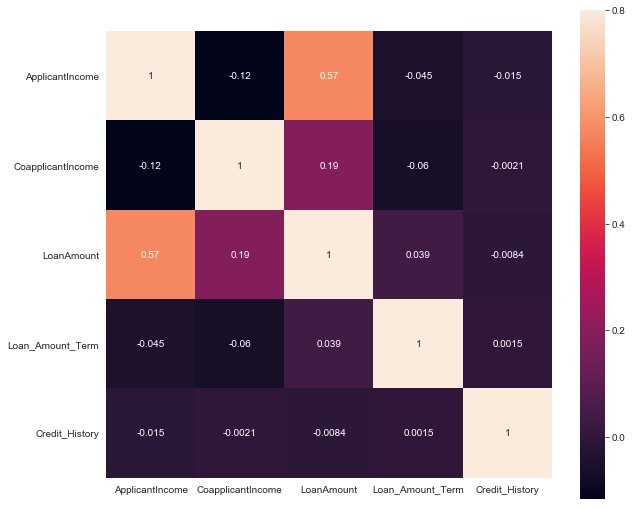

In [9]:
## let's analyze the correlation between the feartures through a heatmap
plt.figure(figsize=(10, 9))
corr = train.corr()
sns.heatmap(corr, square = True, vmax=0.8, annot=True)

*We basically have a considerable correaltions *<br>
- Loan_Amount_Term - Applicant Income  = 0.6


#### visualizing the data

In [10]:
train['Loan_Amt'] = train.LoanAmount.fillna(train.LoanAmount.mean())

In [11]:
train['Loan_Term'] = train.Loan_Amount_Term.fillna(360)

In [12]:
train.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loan_Amt', 'Loan_Term'],
      dtype='object')

In [13]:
subset = train[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Term', 'Loan_Amt']]

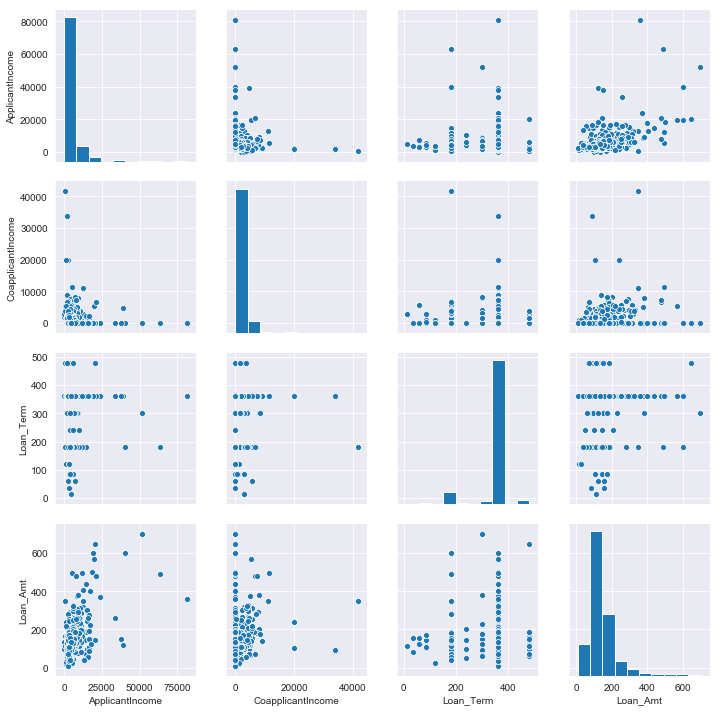

In [14]:
sns.pairplot(subset, palette=['black', 'orange', 'blue'])

In [15]:
# Dropping recently made new columns Loan_Term and Loan_Amt
train.drop(['Loan_Term', 'Loan_Amt'], axis = 1, inplace = True)

In [16]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

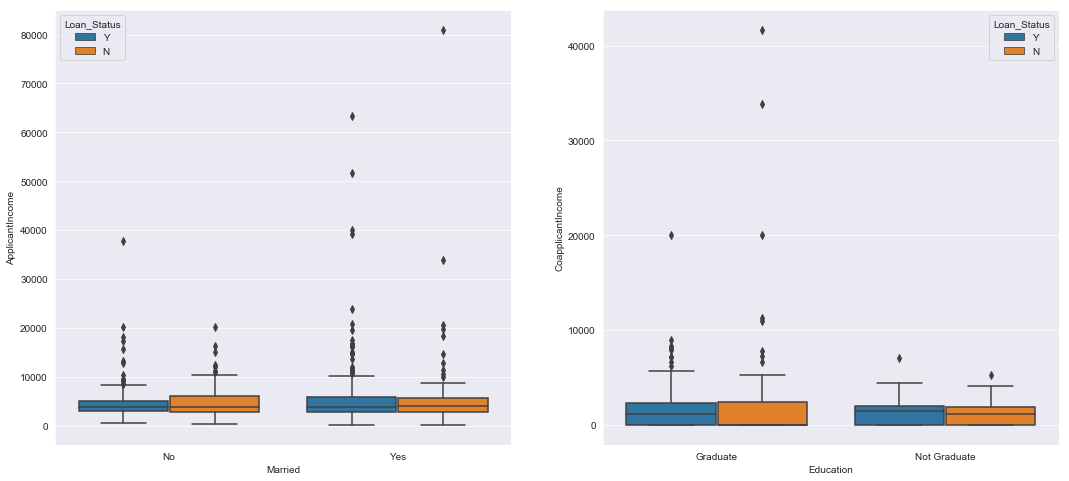

In [17]:
# Drawing two plots in a row 
f,ax=plt.subplots(1,2, figsize=(18,8))
sns.boxplot(x="Married", y="ApplicantIncome", hue='Loan_Status', data=train, ax=ax[0])
sns.boxplot(x="Education", y="CoapplicantIncome", hue='Loan_Status', data=train, ax=ax[1])

### Step 2
### Data Cleaning

In [18]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


####  Outliers

- Applicant's Income

In [19]:
# no. of outliers
fmean = train.ApplicantIncome.mean()
fstd = train.ApplicantIncome.std()

outlier = train.loc[np.abs(train.ApplicantIncome-fmean) >(3.5*fstd), 'ApplicantIncome']
outlier.count()

7

In [20]:
# removing the outliers
train.drop(outlier.index, 0, inplace=True)

In [21]:
# Outliers from Applicant Income has been removed
outlier = train.loc[np.abs(train.ApplicantIncome-fmean) >(3.5*fstd), 'ApplicantIncome']
outlier.count()

0

- CoApplicantIncome

In [22]:
# no of outliers in coapplicant income
cmean = train.CoapplicantIncome.mean()
cstd = train.CoapplicantIncome.std()

outliers = train.loc[np.abs(train.CoapplicantIncome-cmean) > (2.5*cstd), 'CoapplicantIncome']
outlier.count()

# no outliers found in coapplicantIncome

0

- LoanAmount

In [23]:
# no of outliers in loanAmount
lmean = train.CoapplicantIncome.mean()
lstd = train.CoapplicantIncome.std()

outliers = train.loc[np.abs(train.LoanAmount-lmean) > (3*lstd), 'LoanAmount']
outliers.count()

0

#### Joining the train and the test data

In [24]:
n_train = train.shape[0]
n_test = test.shape[0]

###  removing the target variable from the data dataframe
y_train = train.Loan_Status
data = train.append(test)
data.drop(['Loan_Status'], 1, inplace=True)
data.shape

(974, 11)

#### Missing values

In [25]:
## data_na stores the null values of features by %
## data_na is a dataframe only
data_na = (data.isnull().sum() / len(data)) * 100
print(data_na.head())

## dropping the features having 0 null values and sorting them in the decending order
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

## now we are creating the dataframe analyse the missing ratios
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(10)

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Credit_History       8.110883
Dependents           2.566735
Education            0.000000
dtype: float64


,Missing Ratio
Credit_History,8.110883
Self_Employed,5.544148
LoanAmount,2.772074
Dependents,2.566735
Gender,2.361396
Loan_Amount_Term,2.053388
Married,0.308008


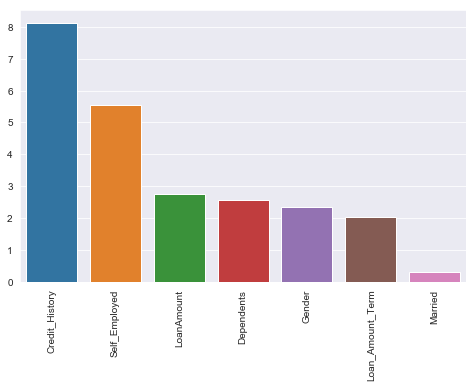

In [26]:
###  let's plot this data
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x=data_na.index, y=data_na)

#### Replacing the missing values

- Credit History

In [27]:
data.Credit_History.value_counts(dropna=False)

 1.0    749
 0.0    146
NaN      79
Name: Credit_History, dtype: int64

In [28]:
## 0,1 are classes and hence we'll create nan as a different classes
data.Credit_History.fillna(2, inplace=True)

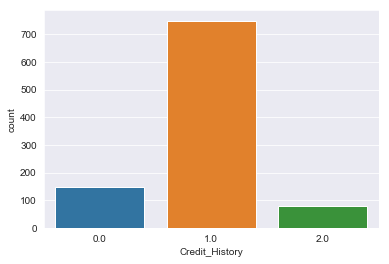

In [29]:
sns.countplot(data=data, x='Credit_History')

- Self Employed

In [30]:
data.groupby(y_train)['Self_Employed'].value_counts(dropna=False)

Loan_Status  Self_Employed
N            No               155
             Yes               26
             NaN                9
Y            No               340
             Yes               55
             NaN               22
Name: Self_Employed, dtype: int64

In [31]:
data.Self_Employed.value_counts(dropna = False)

No     802
Yes    118
NaN     54
Name: Self_Employed, dtype: int64

In [32]:
data.Self_Employed = data['Self_Employed'].fillna('No')

In [33]:
data[data.Self_Employed.isnull()==False].Self_Employed.count()

974

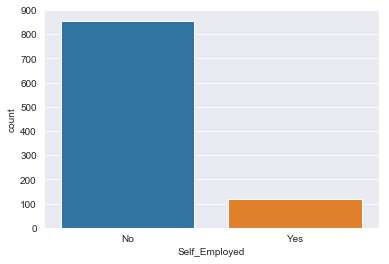

In [34]:
sns.countplot(data=data, x='Self_Employed')

- Loan Amount
- Loan_Amount_Term

In [35]:
## Absence in values means that no loan is provided , hence will impute it with 0
data.LoanAmount.fillna(0, inplace=True)
data.Loan_Amount_Term.fillna(0, inplace=True)

- Dependents

In [36]:
data.groupby(y_train)['Dependents'].value_counts(dropna=False)

Loan_Status  Dependents
N            0             107
             1              35
             2              25
             3+             17
             NaN             6
Y            0             236
             2              76
             1              65
             3+             31
             NaN             9
Name: Dependents, dtype: int64

In [37]:
## imputing 3+ with 3 and
data.Dependents.replace({'3+':3, np.nan:4}, inplace=True)

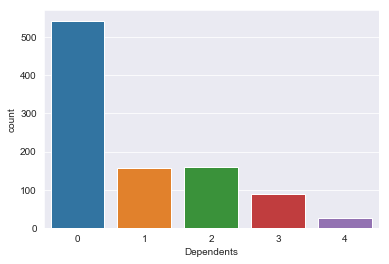

In [38]:
sns.countplot(data=data, x='Dependents')

- Gender
- Married

In [39]:
print(data.groupby(y_train)['Gender'].value_counts(dropna=False))
print('----------------------------')
data.Married.value_counts(dropna=False)

Loan_Status  Gender
N            Male      148
             Female     37
             NaN         5
Y            Male      335
             Female     75
             NaN         7
Name: Gender, dtype: int64
----------------------------


Yes    625
No     346
NaN      3
Name: Married, dtype: int64

In [40]:
## As there can be only two genders , we need to impute it with one of the classes
data.Gender.replace({np.nan:'Male'}, inplace=True)
data.Married.replace({np.nan:'Yes'}, inplace=True)

In [41]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,
LP001002,5849,0.0,1.0,0,Graduate,Male,0.0,360.0,No,Urban,No
LP001003,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,Yes,Rural,No
LP001005,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Yes,Urban,Yes
LP001006,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Yes,Urban,No
LP001008,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,No,Urban,No


*Checking if all the null values are imputed or not*

In [42]:
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

### Step 3
### Feature Engineering

In [43]:
data.shape

(974, 11)

In [44]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,
LP001002,5849,0.0,1.0,0,Graduate,Male,0.0,360.0,No,Urban,No
LP001003,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,Yes,Rural,No
LP001005,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Yes,Urban,Yes
LP001006,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Yes,Urban,No
LP001008,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,No,Urban,No


#### Label Encoding

In [45]:
cols = ['Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']

In [46]:
## importing scikit learn library
from sklearn.preprocessing import LabelEncoder

for s in cols:
    lab = LabelEncoder()
    lab.fit(list(data[s].values))
    data[s] = lab.transform(list(data[s].values))

In [47]:
data.shape

(974, 11)

- Adding a new feature having a combination of the Applicant and the Coapplicant Income

In [48]:
data['TotalIncome'] = data.ApplicantIncome + data.CoapplicantIncome

#### Creating dummies for qualitative features

In [49]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed,TotalIncome
Loan_ID,,,,,,,,,,,,
LP001002,5849,0.0,1.0,0,0,1,0.0,360.0,0,2,0,5849.0
LP001003,4583,1508.0,1.0,1,0,1,128.0,360.0,1,0,0,6091.0
LP001005,3000,0.0,1.0,0,0,1,66.0,360.0,1,2,1,3000.0
LP001006,2583,2358.0,1.0,0,1,1,120.0,360.0,1,2,0,4941.0
LP001008,6000,0.0,1.0,0,0,1,141.0,360.0,0,2,0,6000.0


In [50]:
data = pd.get_dummies(data)

In [51]:
## shape of data
data.shape

(974, 16)

In [52]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed,TotalIncome,Dependents_3,Dependents_4,Dependents_0,Dependents_1,Dependents_2
Loan_ID,,,,,,,,,,,,,,,,
LP001002,5849,0.0,1.0,0,1,0.0,360.0,0,2,0,5849.0,0,0,1,0,0
LP001003,4583,1508.0,1.0,0,1,128.0,360.0,1,0,0,6091.0,0,0,0,1,0
LP001005,3000,0.0,1.0,0,1,66.0,360.0,1,2,1,3000.0,0,0,1,0,0
LP001006,2583,2358.0,1.0,1,1,120.0,360.0,1,2,0,4941.0,0,0,1,0,0
LP001008,6000,0.0,1.0,0,1,141.0,360.0,0,2,0,6000.0,0,0,1,0,0


- Refreshing our train and the test data

In [53]:
train = data[:n_train]
test = data[n_train:]

In [54]:
print(train.shape)
print(test.shape)
y_train.shape

(607, 16)
(367, 16)


(607,)

### Step 4 
### Algorithm Selection

In [55]:
## importing the algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## other meaningful modules
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

## cross validation and KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

- we'll create a method to perform cross validation for every model

In [56]:
def crossVal(model):
    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 12)
    scores = cross_val_score(model, train, y_train, scoring = 'accuracy', cv = skf, n_jobs=1)
    return(scores)

- StratifiedKFold is used to split data according to target variable. We want each fold to be a good representative for whole data.

### Step 5
### Model Traning

- Logistic Regression

In [57]:
logR = LogisticRegression()
result = crossVal(logR)
print(result)
result.mean()

[0.7704918  0.80327869 0.80327869 0.78688525 0.85245902 0.83606557
 0.83606557 0.85       0.78333333 0.75      ]


0.8071857923497268

*cross returns an array of accuracy score across all the folds, thus we take the mean*<br>
*this will be our training accuracy*

- Ridge Classifier

In [58]:
ridge = RidgeClassifier()
result = crossVal(ridge)
print(result.mean())

0.8088524590163935


- K Neighrest Neighbours


*GridSearchCv is an approach for parameter tuning and then evaluating the best parameter values*<br>
*Applying GridSearchCV in KNN*

In [59]:
params = {'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40]}

In [60]:
Knn = GridSearchCV(KNeighborsClassifier(), params)
result = crossVal(Knn)
print(result.mean())

0.683688524590164


- Gaussian Naive Bayes

In [61]:
Gnb = GaussianNB()
result = crossVal(Gnb)
result.mean()

0.7611475409836066

- Descision Tree

GridSearchCV in Decision tree for tuning the parameter values.

In [62]:
param_grid = {'criterion': ('gini', 'entropy'), 'max_depth': [2, 4, 6, 8, 10, 15, 20]}

In [64]:
dtree = DecisionTreeClassifier()
tree = GridSearchCV(dtree, param_grid)
result = crossVal(tree)
print(result.mean())

0.8039617486338798


- Linear Discriminant Analysis

In [65]:
lda = LinearDiscriminantAnalysis()
result = crossVal(lda)
result.mean()

0.8055464480874317

- Random Forest 

Applying GridSearchCV in random forest classifier for parameter tuning.

In [66]:
params = {'n_estimators':[5, 10, 15, 20, 25, 30], 'criterion': ('gini', 'entropy'), 'max_depth': [2, 3, 4, 5, 6, 7, 8 ,9, 10]}

In [67]:
forestClassifier = RandomForestClassifier()
forest = GridSearchCV(forestClassifier, params, n_jobs=1)
result = crossVal(forest)
result.mean()

0.8138797814207651

- Support Vector Macchines

In [68]:
svm = SVC()
result = crossVal(svm)
result.mean()

0.6869672131147542

- Gradient Boosting Classifier

Applying GridSearchCV on gradient boosting classifier for parameter tuning.

In [71]:
params = {'learning_rate': [.1, .01, .02, .03, .04], 'n_estimators' : [400, 500, 600, 700]}

In [72]:
gradientB = GradientBoostingClassifier()
gradient = GridSearchCV(gradientB, params)
result = crossVal(gradient)
result.mean()

0.8039617486338798

- Ada Boost Classifier

In [244]:
ada = AdaBoostClassifier()
result = crossVal(ada)
result.mean()

0.80065573770491805

#### Fitting the data and Making Predictions

In [245]:
## fitting
logR.fit(train, y_train)
ridge.fit(train, y_train)
tree.fit(train, y_train)
lda.fit(train, y_train)
forest.fit(train, y_train)
svm.fit(train, y_train)
gradient.fit(train, y_train)
ada.fit(train, y_train)

## predicting
log_pred = logR.predict(test)
ridge_pred = ridge.predict(test)
tree_pred = tree.predict(test)
lda_pred = lda.predict(test)
forest_pred = forest.predict(test)
svm_pred = svm.predict(test)
gradient_pred = gradient.predict(test)
ada_pred = gradient.predict(test)

In [246]:
## pred shape for eg:- log
log_pred.shape

(367,)

### Step 6
### Submission 

In [256]:
sub = pd.DataFrame()
sub['Loan_ID'] = test.index

## logistic regression
##sub['Loan_Status'] = log_pred
##sub.to_csv('log_pred.csv',index=False)

## Ridge Classfier
##sub['Loan_Status'] = ridge_pred
##sub.to_csv('ridge_pred.csv',index=False)

## Decision Tree
##sub['Loan_Status'] = tree_pred
##sub.to_csv('tree_pred.csv',index=False)

In [257]:

## Random Forest
sub['Loan_Status'] = forest_pred
sub.to_csv('forest_pred.csv',index=False)


## SVM
##sub['Loan_Status'] = svm_pred
##sub.to_csv('svm_pred.csv',index=False)


### Hence we complete this dataset by applying the required techniques of machine learning and comapring them based on the accuracy score 
- As this is a hackthon competion dataset we can evaluate the test_data score
- However we found that the logistic regression, ridge classifier, linear discriminant analysis, decision tree, gradient boosting classifier, ada boost classifier and the forest classifier has produced the best training accuracy, so they are likely to perform well on the test dataset as well !!